

###  **Movie Rating Analysis**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.filterwarnings(action='once')

In [2]:
users_df = pd.read_csv('/content/users.dat', sep='::', encoding='latin-1', names=["userid","Gender","18+Age","Unkwn1","Unkwn2"])
users_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


userid Gender  18+Age  Unkwn1 Unkwn2
0       1      F       1      10  48067
1       2      M      56      16  70072
2       3      M      25      15  55117
3       4      M      45       7  02460
4       5      M      25      20  55455

In [3]:
movies_df = pd.read_csv('/content/movies.dat', sep='::', encoding='latin-1', names=["movieid","Movie Name","Genre"])
movies_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


movieid                          Movie Name                         Genre
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [4]:
ratings_df = pd.read_csv('/content/ratings.dat', sep='::', encoding='latin-1', names=["userid","movieid","rating","rating_timestamp"])
ratings_df["rating_timestamp"] = pd.to_datetime(ratings_df["rating_timestamp"], unit='s')
ratings_df["rating"] = ratings_df["rating"].astype(int)
ratings_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


userid  movieid  rating    rating_timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11

In [5]:
ratings_df = pd.merge(ratings_df,users_df,on="userid",how="inner")
ratings_df.drop("Unkwn1",inplace=True,axis=1)
ratings_df.drop("Unkwn2",inplace=True,axis=1)
ratings_df.head()

userid  movieid  rating    rating_timestamp Gender  18+Age
0       1     1193       5 2000-12-31 22:12:40      F       1
1       1      661       3 2000-12-31 22:35:09      F       1
2       1      914       3 2000-12-31 22:32:48      F       1
3       1     3408       4 2000-12-31 22:04:35      F       1
4       1     2355       5 2001-01-06 23:38:11      F       1

In [6]:
ratings_df = ratings_df.sort_values("movieid")
ratings_df.head()

userid  movieid  rating    rating_timestamp Gender  18+Age
427702    2599        1       4 2000-11-09 19:04:49      M      25
1966        18        1       4 2000-12-30 05:39:28      F      18
683688    4089        1       5 2000-08-04 22:42:27      M      25
596207    3626        1       4 2000-08-18 10:20:18      M      25
465902    2873        1       5 2000-10-29 01:51:57      F      18

In [7]:
movies_df = movies_df.set_index("movieid")
ratings_df = ratings_df.set_index("movieid")

In [8]:
movie_genre = movies_df["Genre"].str.get_dummies()
movie_genre

Action  Adventure  Animation  ...  Thriller  War  Western
movieid                                ...                        
1             0          0          1  ...         0    0        0
2             0          1          0  ...         0    0        0
3             0          0          0  ...         0    0        0
4             0          0          0  ...         0    0        0
5             0          0          0  ...         0    0        0
...         ...        ...        ...  ...       ...  ...      ...
3948          0          0          0  ...         0    0        0
3949          0          0          0  ...         0    0        0
3950          0          0          0  ...         0    0        0
3951          0          0          0  ...         0    0        0
3952          0          0          0  ...         1    0        0

[3883 rows x 18 columns]

In [9]:
movies_df["release year"] = movies_df["Movie Name"].str[-5:-1]
movies_df["release year"] = movies_df["release year"].astype(int)
movies_df

Movie Name  ... release year
movieid                                      ...             
1                          Toy Story (1995)  ...         1995
2                            Jumanji (1995)  ...         1995
3                   Grumpier Old Men (1995)  ...         1995
4                  Waiting to Exhale (1995)  ...         1995
5        Father of the Bride Part II (1995)  ...         1995
...                                     ...  ...          ...
3948                Meet the Parents (2000)  ...         2000
3949             Requiem for a Dream (2000)  ...         2000
3950                       Tigerland (2000)  ...         2000
3951                Two Family House (2000)  ...         2000
3952                  Contender, The (2000)  ...         2000

[3883 rows x 3 columns]

In [10]:
clean_df = movies_df
clean_df

Movie Name  ... release year
movieid                                      ...             
1                          Toy Story (1995)  ...         1995
2                            Jumanji (1995)  ...         1995
3                   Grumpier Old Men (1995)  ...         1995
4                  Waiting to Exhale (1995)  ...         1995
5        Father of the Bride Part II (1995)  ...         1995
...                                     ...  ...          ...
3948                Meet the Parents (2000)  ...         2000
3949             Requiem for a Dream (2000)  ...         2000
3950                       Tigerland (2000)  ...         2000
3951                Two Family House (2000)  ...         2000
3952                  Contender, The (2000)  ...         2000

[3883 rows x 3 columns]

In [11]:
clean_df = pd.concat([clean_df, movie_genre], axis=1)
clean_df.drop("Genre",inplace=True,axis=1)  # axis = 1 is for column
clean_df["Movie Name"] = clean_df["Movie Name"].str[:-7]

In [12]:
clean_df

Movie Name  release year  ...  War  Western
movieid                                             ...              
1                          Toy Story          1995  ...    0        0
2                            Jumanji          1995  ...    0        0
3                   Grumpier Old Men          1995  ...    0        0
4                  Waiting to Exhale          1995  ...    0        0
5        Father of the Bride Part II          1995  ...    0        0
...                              ...           ...  ...  ...      ...
3948                Meet the Parents          2000  ...    0        0
3949             Requiem for a Dream          2000  ...    0        0
3950                       Tigerland          2000  ...    0        0
3951                Two Family House          2000  ...    0        0
3952                  Contender, The          2000  ...    0        0

[3883 rows x 20 columns]

In [13]:
clean_df = (ratings_df
                  .join(clean_df,
                        how="left")
                 )
clean_df.drop("rating_timestamp",inplace=True,axis=1)
clean_df.reset_index(inplace=True)
clean_df

movieid  userid  rating Gender  ...  Sci-Fi Thriller  War  Western
0              1    2599       4      M  ...       0        0    0        0
1              1      18       4      F  ...       0        0    0        0
2              1    4089       5      M  ...       0        0    0        0
3              1    3626       4      M  ...       0        0    0        0
4              1    2873       5      F  ...       0        0    0        0
...          ...     ...     ...    ...  ...     ...      ...  ...      ...
1000204     3952     551       4      M  ...       0        1    0        0
1000205     3952    1544       4      M  ...       0        1    0        0
1000206     3952    1130       3      M  ...       0        1    0        0
1000207     3952     238       4      F  ...       0        1    0        0
1000208     3952    2177       5      F  ...       0        1    0        0

[1000209 rows x 25 columns]

**Hoorayy!! Our dataset is being cleaned**

### Data Analysis

In [14]:
clean_df["release year"].mode() 

0    1999
dtype: int64



> People might love 1999 movies more



Text(0, 0.5, 'Count')

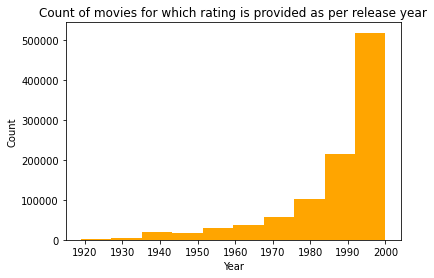

In [15]:
plt.hist(clean_df["release year"],color="orange")
plt.title("Count of movies for which rating is provided as per release year");
plt.xlabel("Year")
plt.ylabel("Count")

In [16]:
def plotGenreGraph(df):
  unique_genres = df.columns[8:]
  count = []
  for y in unique_genres:
    count.append(df[y].sum())
  data = {'Genre Name': unique_genres, 'Count': count}
  rating_count_as_per_genre = pd.DataFrame(data)
  print(rating_count_as_per_genre.sort_values(by="Count"))

  plt.figure(figsize=(18,6))
  sns.set_style("darkgrid")
  plt.subplot(1,2,1)
  plt.plot(rating_count_as_per_genre["Genre Name"], rating_count_as_per_genre["Count"])
  plt.xlabel("Genre name")
  plt.ylabel("Count")
  plt.xticks(rotation=90)

  plt.subplot(1,2,2)
  sns.barplot(rating_count_as_per_genre["Genre Name"], rating_count_as_per_genre["Count"])
  plt.xticks(rotation=90)


In [17]:
plotGenreGraph(clean_df)

plt.subplot(1,2,1)
plt.title("General rated genre count")

plt.subplot(1,2,2)
plt.title("General rated genre count")

     Genre Name   Count
5   Documentary    7910
8     Film-Noir   18261
16      Western   20683
7       Fantasy   36301
11      Mystery   40178
10      Musical   41533
1     Animation   43293
15          War   68527
2    Children's   72186
9        Horror   76386
4         Crime   79541
0     Adventure  133953
12      Romance  147523
13       Sci-Fi  157294
14     Thriller  189680
6         Drama  354529
3        Comedy  356580


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'General rated genre count')



*   People love watching drama and comedy movies


*   Documentary films count is very less

*   Sci-Fi, Thriller, Romance and adventure also have good count.










In [18]:
top_movies = clean_df[clean_df['rating']==5][["Movie Name","rating"]]
top_25 = list(top_movies["Movie Name"].unique())
top_25[0:25]

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'American President, The',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello']

In [19]:
clean_df["Gender"].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [20]:
female_df = clean_df[clean_df["Gender"]=='F']
plotGenreGraph(female_df)

plt.subplot(1,2,1)
plt.title("genre count for females")
plt.subplot(1,2,2)
plt.title("genre count for females")

     Genre Name  Count
5   Documentary   1940
16      Western   3477
8     Film-Noir   4202
7       Fantasy   8718
11      Mystery   9976
1     Animation  12221
10      Musical  13505
15          War  14093
9        Horror  14635
4         Crime  16442
2    Children's  21317
0     Adventure  27332
13       Sci-Fi  27400
14     Thriller  40308
12      Romance  50297
3        Comedy  96271
6         Drama  98153


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'genre count for females')



> Drama, comedy, romance, thriller genres are prefered by female



     Genre Name   Count
5   Documentary    5970
8     Film-Noir   14059
16      Western   17206
7       Fantasy   27583
10      Musical   28028
11      Mystery   30202
1     Animation   31072
2    Children's   50869
15          War   54434
9        Horror   61751
4         Crime   63099
12      Romance   97226
0     Adventure  106621
13       Sci-Fi  129894
14     Thriller  149372
6         Drama  256376
3        Comedy  260309


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'genre count for males')

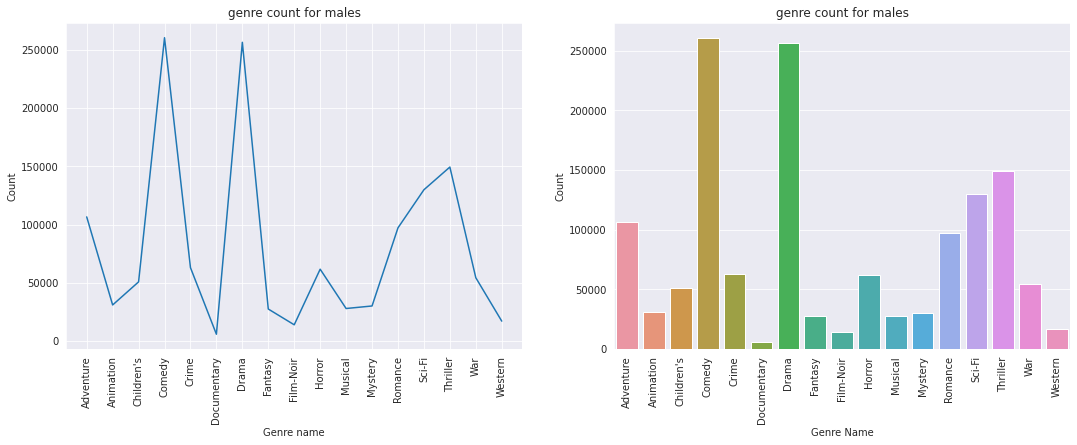

In [21]:
male_df = clean_df[clean_df["Gender"]=='M']
plotGenreGraph(male_df)

plt.subplot(1,2,1)
plt.title("genre count for males")
plt.subplot(1,2,2)
plt.title("genre count for males")



> Comedy, drama, thriller, sci-fi and adventure genres are preferred by male



**Now let's do analysis on only those movies with rating = 5**

In [22]:
rating5 = clean_df[clean_df['rating']==5]
rating5.head()

movieid  userid  rating Gender  ...  Sci-Fi Thriller  War  Western
2        1    4089       5      M  ...       0        0    0        0
4        1    2873       5      F  ...       0        0    0        0
5        1     528       5      F  ...       0        0    0        0
7        1    2652       5      M  ...       0        0    0        0
8        1    6015       5      F  ...       0        0    0        0

[5 rows x 25 columns]

In [23]:
rating5["Gender"].value_counts()

M    167764
F     58546
Name: Gender, dtype: int64

     Genre Name  Count
5   Documentary   2684
16      Western   4965
7       Fantasy   6989
8     Film-Noir   7053
11      Mystery  10039
10      Musical  10495
1     Animation  10795
9        Horror  12162
2    Children's  13574
4         Crime  20893
15          War  23423
0     Adventure  26608
12      Romance  32059
13       Sci-Fi  32441
14     Thriller  41408
3        Comedy  73530
6         Drama  96629


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Movie count as per genre with Rating 5')

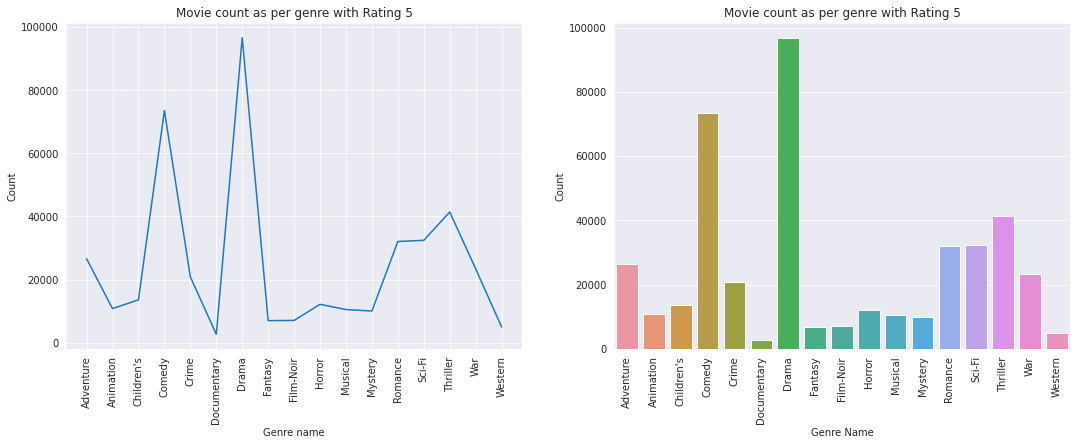

In [24]:
plotGenreGraph(rating5)
plt.subplot(1,2,1)
plt.title("Movie count as per genre with Rating 5")

plt.subplot(1,2,2)
plt.title("Movie count as per genre with Rating 5")

In [25]:
rating5["release year"].mode()

0    1999
dtype: int64



> Insights for movies with rating 5

Gender:
Male > Female<br/>
Release year:
1999 movies most rated<br/>
Top Genres:
Drama and Comedy<br/>





**Let's do some analysis on rating column**

In [26]:
clean_df["rating"].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [27]:
clean_df["rating"].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Text(0.5, 1.0, 'rating vs count')

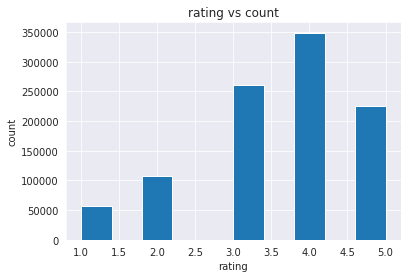

In [28]:
plt.hist(clean_df["rating"])
plt.xlabel("rating")
plt.ylabel("count")
plt.title("rating vs count")



> Top rating is 4



**Let's analyse userid column**

In [29]:
clean_df["userid"].value_counts().sort_values(ascending=False)

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
1351      20
5159      20
5145      20
2673      20
2696      20
Name: userid, Length: 6040, dtype: int64

In [30]:
clean_df["userid"].value_counts().describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: userid, dtype: float64

In [31]:
len(clean_df["userid"].unique())

6040



1. user with userid = 4169 has provided the highest number of ratings with a count of 2314




**Let's look at release year column**

In [32]:
clean_df["release year"].unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1948, 1943, 1963, 1950,
       1987, 1997, 1974, 1958, 1972, 1998, 1952, 1951, 1957, 1961, 1954,
       1934, 1944, 1942, 1941, 1953, 1939, 1947, 1946, 1945, 1938, 1935,
       1936, 1926, 1949, 1932, 1930, 1971, 1979, 1986, 1966, 1978, 1985,
       1983, 1984, 1933, 1931, 1922, 1927, 1929, 1928, 1999, 1925, 1919,
       1923, 2000, 1920, 1921])

In [33]:
len(clean_df["release year"].unique())

81

In [34]:
clean_df["release year"].describe()

count    1.000209e+06
mean     1.986698e+03
std      1.434933e+01
min      1.919000e+03
25%      1.982000e+03
50%      1.992000e+03
75%      1.997000e+03
max      2.000000e+03
Name: release year, dtype: float64

In [35]:
movie_count = clean_df[["movieid","release year"]].groupby("release year")
movie_count.count()

movieid
release year         
1919               45
1920               24
1921               62
1922              238
1923               17
...               ...
1996            59382
1997            65402
1998            68226
1999            86833
2000            41000

[81 rows x 1 columns]

In [36]:
movie_count.count().sort_values(by="movieid",ascending=False)

movieid
release year         
1999            86833
1998            68226
1997            65402
1995            60754
1996            59382
...               ...
1919               45
1929               43
1928               27
1920               24
1923               17

[81 rows x 1 columns]

Text(0, 0.5, 'Count')

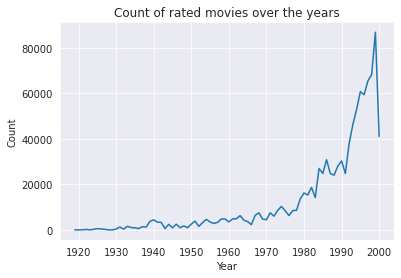

In [37]:
plt.plot(movie_count.count())
plt.title("Count of rated movies over the years")
plt.xlabel("Year")
plt.ylabel("Count")

1. There are 81 unique years
2. min = 1919 and max = 2000
3. In 2000, only 30k ratings provided which is very less compared to 1999
4. There's a serious decline in rated movies after 1999
5. There was rise in rating from 1990 to 1999 i.e. people watched more movies in this decade



> Which genre have people loved watching in this decade(1990-2000)?



In [38]:
  unique_genres = clean_df.columns[8:]
  count = []
  for y in unique_genres:
    count.append(clean_df[y].sum())
  data = {'Genre Name': unique_genres, 'Count': count}
  rating_count_as_per_genre = pd.DataFrame(data)
  print(rating_count_as_per_genre.sort_values(by="Count",ascending=False))

     Genre Name   Count
3        Comedy  356580
6         Drama  354529
14     Thriller  189680
13       Sci-Fi  157294
12      Romance  147523
0     Adventure  133953
4         Crime   79541
9        Horror   76386
2    Children's   72186
15          War   68527
1     Animation   43293
10      Musical   41533
11      Mystery   40178
7       Fantasy   36301
16      Western   20683
8     Film-Noir   18261
5   Documentary    7910


Let's just consider top 6 genres

In [39]:
top6 = rating_count_as_per_genre.sort_values(by="Count",ascending=False)[["Genre Name"]][0:6]
top6 = list(top6["Genre Name"])
top6

['Comedy', 'Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Adventure']

In [40]:
genre_count = clean_df[top6]
genre_count["release year"] = clean_df["release year"]
genre_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Comedy  Drama  Thriller  Sci-Fi  Romance  Adventure  release year
0             1      0         0       0        0          0          1995
1             1      0         0       0        0          0          1995
2             1      0         0       0        0          0          1995
3             1      0         0       0        0          0          1995
4             1      0         0       0        0          0          1995
...         ...    ...       ...     ...      ...        ...           ...
1000204       0      1         1       0        0          0          2000
1000205       0      1         1       0        0          0          2000
1000206       0      1         1       0        0          0          2000
1000207       0      1         1       0        0          0          2000
1000208       0      1         1       0        0          0          2000

[1000209 rows x 7 columns]

In [41]:
genre_count = genre_count.groupby("release year")

In [42]:
genre_count = genre_count.sum().loc[1990:2000]
genre_count

Comedy  Drama  Thriller  Sci-Fi  Romance  Adventure
release year                                                     
1990            8382   9692     10756    5729     4972       4240
1991            6896  11132      6811    4982     3699       2542
1992           15437  13285      7165    4191     7418       1771
1993           17462  16636      7265    5799     8712       5997
1994           23172  19803      8382    3374    13929       5504
1995           21244  26390     13493    7135    12272       7594
1996           20142  22188     15632    7517    11264       9361
1997           21452  25287     20551   12696     9275       9264
1998           24911  23730     17871    8370    13287       5204
1999           36869  29602     21419   10307     8661       6354
2000           15515  13662     10086    5605     2136       2310

Text(0, 0.5, 'Count')

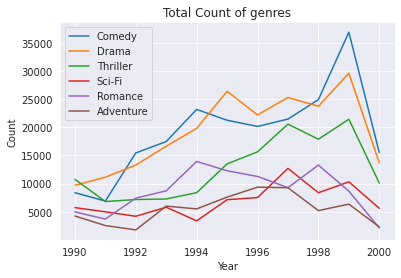

In [43]:
plt.plot(genre_count)
plt.legend(top6)
plt.title("Total Count of genres")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

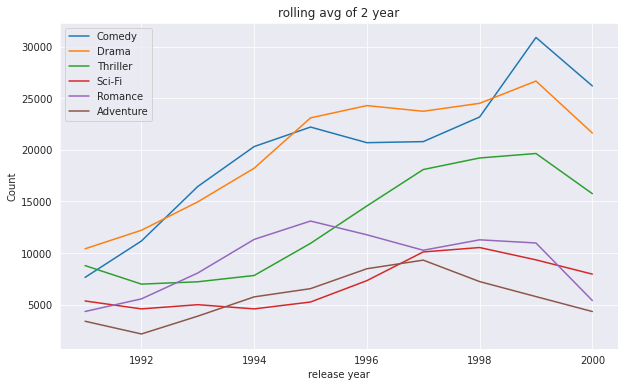

In [44]:
genre_count.rolling(2).mean().plot(figsize=(10,6),
                                    title="rolling avg of 2 year")
plt.ylabel("Count")

Comedy > Drama > Thriller > Sci-Fi > Romance > Adventure

Let's look at percent change of genre rating over the years

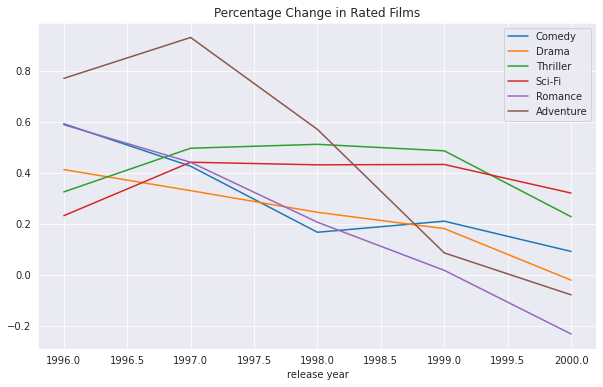

In [45]:
percent_change = genre_count.pct_change(periods=2)
(percent_change.rolling(5).mean() # 5 years moving average
 .plot(figsize=(10,6),
       title="Percentage Change in Rated Films"))

Seems like people are now getting interested in Sci-Fi and Thriller genres



##  **Specific Analysis tasks to be performed as per the problem statement**



**1. User Age Distribution**

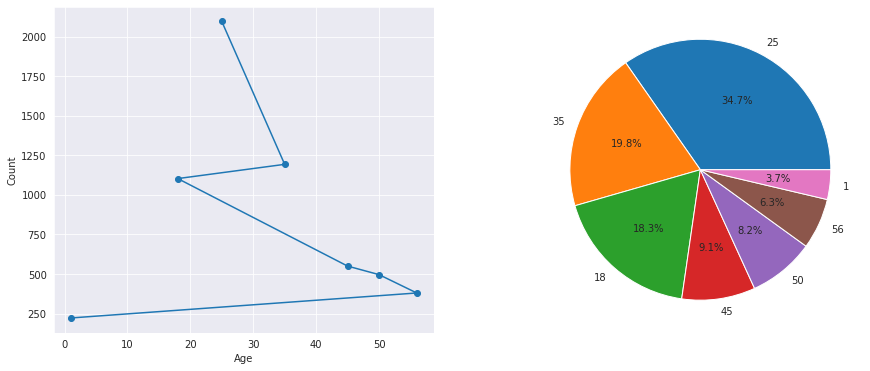

In [46]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(users_df["18+Age"].value_counts(),marker='o')
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(users_df["18+Age"].value_counts(),autopct="%.1f%%",labels=['25','35','18','45','50','56','1']);

**2. User rating of the movie “Toy Story”**

In [47]:
toy_story_df = clean_df[clean_df["movieid"]==1][["movieid","Movie Name","rating"]]
toy_story_df.head()

movieid Movie Name  rating
0        1  Toy Story       4
1        1  Toy Story       4
2        1  Toy Story       5
3        1  Toy Story       4
4        1  Toy Story       5

In [48]:
print("Average rating of Toy Story is ", toy_story_df["rating"].mean())

Average rating of Toy Story is  4.146846413095811


**3. Top 25 movies by viewership rating**

In [49]:
top25 = clean_df[clean_df["rating"]>2][["movieid", "Movie Name", "rating"]]
top25.head()

movieid Movie Name  rating
0        1  Toy Story       4
1        1  Toy Story       4
2        1  Toy Story       5
3        1  Toy Story       4
4        1  Toy Story       5

In [50]:
top25 = top25.groupby("movieid")["rating"]

In [51]:
top25.head()

0         4
1         4
2         5
3         4
4         5
         ..
999821    5
999822    5
999823    3
999824    3
999825    5
Name: rating, Length: 17223, dtype: int64

In [52]:
t = top25.count().sort_values(ascending=False)[0:25]

In [53]:
t

movieid
2858    3211
260     2910
1196    2885
1210    2716
2028    2561
589     2509
593     2498
1198    2473
1270    2460
2571    2434
480     2413
2762    2385
608     2371
110     2314
1580    2297
527     2257
1197    2252
2396    2213
1617    2210
318     2194
858     2167
1265    2121
1097    2102
2997    2066
2716    2051
Name: rating, dtype: int64

In [54]:
list_of_ids = list(t.index)
list_of_ids

[2858,
 260,
 1196,
 1210,
 2028,
 589,
 593,
 1198,
 1270,
 2571,
 480,
 2762,
 608,
 110,
 1580,
 527,
 1197,
 2396,
 1617,
 318,
 858,
 1265,
 1097,
 2997,
 2716]

In [55]:
mean = top25.mean()
top25index=mean[list_of_ids].sort_values(ascending=False)
top25index

movieid
858     4.598523
318     4.596627
527     4.571112
260     4.528522
1198    4.520421
2858    4.499844
2762    4.487631
2571    4.479458
593     4.441954
2028    4.431082
608     4.413749
1196    4.384055
1197    4.380995
110     4.375540
2997    4.338819
1617    4.305430
2396    4.294171
589     4.190116
1210    4.161635
1097    4.137012
1265    4.114569
1270    4.097967
2716    4.038030
480     3.978864
1580    3.942969
Name: rating, dtype: float64

In [56]:
list_of_top25index = list(top25index.index)
list_of_top25index

[858,
 318,
 527,
 260,
 1198,
 2858,
 2762,
 2571,
 593,
 2028,
 608,
 1196,
 1197,
 110,
 2997,
 1617,
 2396,
 589,
 1210,
 1097,
 1265,
 1270,
 2716,
 480,
 1580]

In [57]:
movies_df.reset_index(inplace=True)
pd.set_option('max_columns', None)
for i in list_of_top25index:
  print(movies_df[movies_df["movieid"]==i])
  print("\n")
movies_df = movies_df.set_index("movieid")

     movieid             Movie Name               Genre  release year
847      858  Godfather, The (1972)  Action|Crime|Drama          1972


     movieid                        Movie Name  Genre  release year
315      318  Shawshank Redemption, The (1994)  Drama          1994


     movieid               Movie Name      Genre  release year
523      527  Schindler's List (1993)  Drama|War          1993


     movieid                                 Movie Name  \
257      260  Star Wars: Episode IV - A New Hope (1977)   

                               Genre  release year  
257  Action|Adventure|Fantasy|Sci-Fi          1977  


      movieid                      Movie Name             Genre  release year
1180     1198  Raiders of the Lost Ark (1981)  Action|Adventure          1981


      movieid              Movie Name         Genre  release year
2789     2858  American Beauty (1999)  Comedy|Drama          1999


      movieid               Movie Name     Genre  release year
2693     2

**4. Find the ratings for all the movies reviewed by for a particular user of user-id = 2696**

In [58]:
clean_df[clean_df["userid"]==2696][["userid","Gender", "18+Age", "movieid","rating","Movie Name","release year"]]

userid Gender  18+Age  movieid  rating  \
95249     2696      M      25      350       3   
200434    2696      M      25      800       5   
270087    2696      M      25     1092       4   
274557    2696      M      25     1097       3   
349226    2696      M      25     1258       4   
361544    2696      M      25     1270       2   
448152    2696      M      25     1589       3   
458441    2696      M      25     1617       4   
459863    2696      M      25     1625       4   
464585    2696      M      25     1644       2   
465238    2696      M      25     1645       4   
480860    2696      M      25     1711       4   
493328    2696      M      25     1783       4   
496948    2696      M      25     1805       4   
507194    2696      M      25     1892       4   
631983    2696      M      25     2338       2   
645895    2696      M      25     2389       4   
732020    2696      M      25     2713       1   
852043    2696      M      25     3176       4   
889657    2696      M      25     3386       1   

                                     Movie Name  release year  
95249                               Client, The          1994  
200434                                Lone Star          1996  
270087                           Basic Instinct          1992  
274557               E.T. the Extra-Terrestrial          1982  
349226                             Shining, The          1980  
361544                       Back to the Future          1985  
448152                                 Cop Land          1997  
458441                        L.A. Confidential          1997  
459863                                Game, The          1997  
464585          I Know What You Did Last Summer          1997  
465238                    Devil's Advocate, The          1997  
480860  Midnight in the Garden of Good and Evil          1997  
493328                                 Palmetto          1998  
496948                              Wild Things          1998  
507194                        Perfect Murder, A          1998  
631983    I Still Know What You Did Last Summer          1998  
645895                                   Psycho          1998  
732020                              Lake Placid          1999  
852043                 Talented Mr. Ripley, The          1999  
889657                                      JFK          1991

**For column genre:**

**1.Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)**


In [59]:
unique_genres = clean_df.columns[8:]
list(unique_genres)

['Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [60]:
len(unique_genres)

17

There are total 17 unique genres

**2. Create a separate column for each genre category with a one-hot encoding (1 and 0) whether or not the movie belongs to that genre.**

In [61]:
movie_genre = movies_df["Genre"].str.get_dummies()
movie_genre

Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
movieid                                                                         
1             0          0          1           1       1      0            0   
2             0          1          0           1       0      0            0   
3             0          0          0           0       1      0            0   
4             0          0          0           0       1      0            0   
5             0          0          0           0       1      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
3948          0          0          0           0       1      0            0   
3949          0          0          0           0       0      0            0   
3950          0          0          0           0       0      0            0   
3951          0          0          0           0       0      0            0   
3952          0          0          0           0       0      0            0   

         Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
movieid                                                                         
1            0        0          0       0        0        0        0       0   
2            0        1          0       0        0        0        0       0   
3            0        0          0       0        0        0        1       0   
4            1        0          0       0        0        0        0       0   
5            0        0          0       0        0        0        0       0   
...        ...      ...        ...     ...      ...      ...      ...     ...   
3948         0        0          0       0        0        0        0       0   
3949         1        0          0       0        0        0        0       0   
3950         1        0          0       0        0        0        0       0   
3951         1        0          0       0        0        0        0       0   
3952         1        0          0       0        0        0        0       0   

         Thriller  War  Western  
movieid                          
1               0    0        0  
2               0    0        0  
3               0    0        0  
4               0    0        0  
5               0    0        0  
...           ...  ...      ...  
3948            0    0        0  
3949            0    0        0  
3950            0    0        0  
3951            0    0        0  
3952            1    0        0  

[3883 rows x 18 columns]

**3. Determine the features affecting the ratings of any particular movie**

Let's take any random movie with rating = 2

In [62]:
clean_df[clean_df["rating"]==2]

movieid  userid  rating Gender  18+Age      Movie Name  release year  \
12             1    4916       2      M      18       Toy Story          1995   
73             1    3993       2      M      25       Toy Story          1995   
105            1    1776       2      M      25       Toy Story          1995   
116            1    1248       2      F      35       Toy Story          1995   
139            1    4533       2      M      25       Toy Story          1995   
...          ...     ...     ...    ...     ...             ...           ...   
1000157     3952    1399       2      M      18  Contender, The          2000   
1000177     3952     910       2      F      50  Contender, The          2000   
1000198     3952    1281       2      M      25  Contender, The          2000   
1000199     3952    3821       2      M      25  Contender, The          2000   
1000200     3952     281       2      F      35  Contender, The          2000   

         Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
12            0          0          1           1       1      0            0   
73            0          0          1           1       1      0            0   
105           0          0          1           1       1      0            0   
116           0          0          1           1       1      0            0   
139           0          0          1           1       1      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
1000157       0          0          0           0       0      0            0   
1000177       0          0          0           0       0      0            0   
1000198       0          0          0           0       0      0            0   
1000199       0          0          0           0       0      0            0   
1000200       0          0          0           0       0      0            0   

         Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
12           0        0          0       0        0        0        0       0   
73           0        0          0       0        0        0        0       0   
105          0        0          0       0        0        0        0       0   
116          0        0          0       0        0        0        0       0   
139          0        0          0       0        0        0        0       0   
...        ...      ...        ...     ...      ...      ...      ...     ...   
1000157      1        0          0       0        0        0        0       0   
1000177      1        0          0       0        0        0        0       0   
1000198      1        0          0       0        0        0        0       0   
1000199      1        0          0       0        0        0        0       0   
1000200      1        0          0       0        0        0        0       0   

         Thriller  War  Western  
12              0    0        0  
73              0    0        0  
105             0    0        0  
116             0    0        0  
139             0    0        0  
...           ...  ...      ...  
1000157         1    0        0  
1000177         1    0        0  
1000198         1    0        0  
1000199         1    0        0  
1000200         1    0        0  

[107557 rows x 25 columns]

Let's consider movieid = 10

In [63]:
movie10 = clean_df[clean_df["movieid"]==10]
movie10

movieid  userid  rating Gender  18+Age Movie Name  release year  Action  \
5290       10    5237       4      M      25  GoldenEye          1995       1   
5291       10    1564       3      M      50  GoldenEye          1995       1   
5292       10    2643       3      M      45  GoldenEye          1995       1   
5293       10    3403       4      M      35  GoldenEye          1995       1   
5294       10      82       4      M      25  GoldenEye          1995       1   
...       ...     ...     ...    ...     ...        ...           ...     ...   
6173       10    1889       4      M      18  GoldenEye          1995       1   
6174       10     877       4      M      25  GoldenEye          1995       1   
6175       10     685       3      M      25  GoldenEye          1995       1   
6176       10    5957       3      M      18  GoldenEye          1995       1   
6177       10    1139       2      M      25  GoldenEye          1995       1   

      Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  \
5290          1          0           0       0      0            0      0   
5291          1          0           0       0      0            0      0   
5292          1          0           0       0      0            0      0   
5293          1          0           0       0      0            0      0   
5294          1          0           0       0      0            0      0   
...         ...        ...         ...     ...    ...          ...    ...   
6173          1          0           0       0      0            0      0   
6174          1          0           0       0      0            0      0   
6175          1          0           0       0      0            0      0   
6176          1          0           0       0      0            0      0   
6177          1          0           0       0      0            0      0   

      Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
5290        0          0       0        0        0        0       0         1   
5291        0          0       0        0        0        0       0         1   
5292        0          0       0        0        0        0       0         1   
5293        0          0       0        0        0        0       0         1   
5294        0          0       0        0        0        0       0         1   
...       ...        ...     ...      ...      ...      ...     ...       ...   
6173        0          0       0        0        0        0       0         1   
6174        0          0       0        0        0        0       0         1   
6175        0          0       0        0        0        0       0         1   
6176        0          0       0        0        0        0       0         1   
6177        0          0       0        0        0        0       0         1   

      War  Western  
5290    0        0  
5291    0        0  
5292    0        0  
5293    0        0  
5294    0        0  
...   ...      ...  
6173    0        0  
6174    0        0  
6175    0        0  
6176    0        0  
6177    0        0  

[888 rows x 25 columns]

The movie name is "GoldenEye"

In [64]:
movie10["rating"].mean()

3.5405405405405403

In [65]:
movie10["Gender"].value_counts()

M    754
F    134
Name: Gender, dtype: int64

In [66]:
movie10["18+Age"].value_counts()

25    365
18    216
35    141
45     55
50     48
1      44
56     19
Name: 18+Age, dtype: int64

In [67]:
len(movie10["userid"].unique())

888

888 unique users have provided ratings



> Factors affecting GoldenEye movie

From analysis we found that:

1. males > females
2. age < 30 public loved this movie
3. 3.54 is the average rating
4. the genre for this movie is action, thriller and adventure previously we have found that drama and comedy are the most watched genres


Conclusion:

Gender, age, genre also the release year affected this movie's rating. Earlier, we found 1999 movies are most watched. Also, the genre didn't match female genre liking hence it's not famous among them.


